<a href="https://colab.research.google.com/github/Josh1313/ML_Telecom_churn/blob/main/ML_2_Martinez_Molina_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 2 - MODEL

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga clean data

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/EJERCICIO-ML-Sup-main/data/clean_df_prepro_pk")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Columns: 108 entries, rev to churn
dtypes: float64(45), int64(22), uint8(41)
memory usage: 49.5 MB


In [ ]:
df.shape

(90000, 108)

In [ ]:
df.set_index('Customer_ID', inplace=True)

In [ ]:
df.head()

,rev,mou,change_mou,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_dat,recv_vce,recv_sms,custcare,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,drop_blk,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,asl_flag,totrev,avgrev,avg3rev,avg6rev,prizm_social_one,dualband,refurb_new,hnd_price,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,income,numbcars,HHstatin,dwllsize,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,area_ATLANTIC SOUTH,area_CALIFORNIA NORTH,area_CENTRAL/SOUTH TEXAS,area_CHICAGO,area_DALLAS,area_DC/MARYLAND/VIRGINIA,area_GREAT LAKES,area_HOUSTON,area_LOS ANGELES,area_MIDWEST,area_NEW ENGLAND,area_NEW YORK CITY,area_NORTH/SOUTH FLORIDA,area_NORTHWEST/ROCKY MOUNTAIN,area_OHIO,area_PHILADELPHIA,area_SOUTHWEST,area_TENNESSEE,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R-i-i-P-X,ethnic_S,ethnic_U,ethnic_Unknown,ethnic_Z,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_Others,crclscod_ZA,churn
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,-157.25,0.666667,0.0,0.666667,0.0,6.333333,0.0,0.0,42.333333,0.0,0.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,1.333333,45.000000,0.0,0.333333,61,2,1,-99999,0,1504.62,29.66,30,38.0,19,1,0,149.98999,1,0.0,0.0,1,15.0,0,0,1.0,4.0,3.0,3,0.0,0.0,0,0,0,0,0,1,361.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1000002,57.4925,482.75,532.25,8.333333,0.0,1.000000,0.0,61.333333,0.0,0.0,69.000000,0.0,1.666667,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,9.333333,193.333333,0.0,5.666667,56,1,1,0,0,2851.68,51.53,40,48.0,21,0,0,-99999.00000,0,1.0,1.0,-99999,1.0,0,0,1.0,5.0,1.0,3,0.0,0.0,0,0,0,0,0,1,240.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1000003,16.9900,10.25,-4.25,0.333333,0.0,0.000000,0.0,2.666667,0.0,0.0,0.333333,0.0,0.000000,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.333333,6.000000,0.0,0.000000,58,1,1,1,0,2155.91,34.54,17,17.0,19,0,0,29.98999,-99999,0.0,0.0,1,7.0,0,1,2.0,5.0,2.0,3,0.0,0.0,0,1,0,0,0,1,1504.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1000004,38.0000,7.50,-1.50,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.333333,0.0,0.000000,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.000000,3.666667,0.0,0.000000,60,1,1,1,0,2000.90,40.45,38,40.0,20,0,0,29.98999,-99999,0.0,0.0,-99999,6.0,1,1,4.0,6.0,1.0,3,3.0,0.0,1,0,0,0,0,1,1812.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1000005,55.2300,570.50,38.50,9.666667,0.0,0.666667,0.0,77.000000,0.0,0.0,94.666667,0.0,8.666667,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,10.333333,137.000000,0.0,0.000000,57,1,1,1,0,2181.12,38.69,55,80.0,21,1,0,149.98999,1,0.0,0.0,0,5.0,1,0,1.0,6.0,1.0,3,14.0,0.0,0,0,0,0,0,1,434.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Split X-y

In [ ]:
target = 'churn'
features = [i for i in df.columns if i != target]
y = df[target]
X = df[features]

In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: churn
Variables a utilizar en el modelo: ['rev', 'mou', 'change_mou', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_dat', 'recv_vce', 'recv_sms', 'custcare', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'drop_blk', 'complete', 'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'new_cell', 'asl_flag', 'totrev', 'avgrev', 'avg3rev', 'avg6rev', 'prizm_social_one', 'dualband', 'refurb_new', 'hnd_price', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital', 'adults', 'income', 'numbcars', 'HHstatin', 'dwllsize', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays', 'area_ATLANTIC SOUTH', 'area_CALIFORNIA NORTH', 'area_CENTRAL/SOUTH TEXAS', 'area_CHICAGO', 'area_DALLAS', 'area_DC/MARYLAND/VIRGINIA', 'area_GREAT LAKES', 'area_HOUSTON', 'area_LOS 

In [ ]:
y.describe()

count    90000.000000
mean         0.508889
std          0.499924
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: churn, dtype: float64

In [ ]:
y.value_counts()/len(df)

1    0.508889
0    0.491111
Name: churn, dtype: float64

# Distribución del target

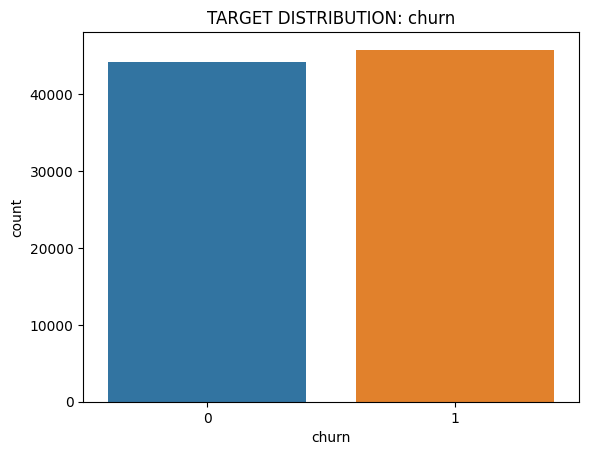

In [ ]:
sns.countplot(x=y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

In [ ]:
y.describe()

count    90000.000000
mean         0.508889
std          0.499924
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: churn, dtype: float64

# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

# Split TRAIN-TEST

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# RANDOM HOLDOUT
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.30,
                                        shuffle = True,
                                        random_state = 42 # Guarda el split en el seed 42 por si volvemos a ejecutar la celda, sea el mismo split
                                     )

In [ ]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 63000
Test data instances: 27000


# Rescaling

* NO NECESARIO en modelos de Arboles de Decisión.
* Guardar scaler en el model path.

# TRAIN-VALIDA

## Torneo de Modelos

Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [ ]:
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])


Calculo de AUC con Cross Validation

In [ ]:
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,
                              scoring='roc_auc'
                              )
  return cross_val.mean()

In [ ]:
label_, auc_train_ , auc_valida_ = [], [], []


In [ ]:
def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
    label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn.linear_model import LogisticRegression

evaluate_classification(model = LogisticRegression(),
                        X = X_train,
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.569921,0.567974


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

evaluate_classification(model = AdaBoostClassifier(), X = X_train, y = y_train)

,Model,AUC Train,AUC Cross-Valida
1,AdaBoostClassifier(),0.655722,0.648397
0,LogisticRegression(),0.569921,0.567974


In [ ]:
from sklearn.ensemble import BaggingClassifier

evaluate_classification(model = BaggingClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,AdaBoostClassifier(),0.655722,0.648397
2,BaggingClassifier(),0.999037,0.603710
0,LogisticRegression(),0.569921,0.567974


In [ ]:
from sklearn.ensemble import RandomForestClassifier

evaluate_classification(model = RandomForestClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,AdaBoostClassifier(),0.655722,0.648397
3,RandomForestClassifier(),1.000000,0.645936
2,BaggingClassifier(),0.999037,0.603710
0,LogisticRegression(),0.569921,0.567974


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

evaluate_classification(model = GradientBoostingClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
4,GradientBoostingClassifier(),0.680129,0.660041
1,AdaBoostClassifier(),0.655722,0.648397
3,RandomForestClassifier(),1.000000,0.645936
2,BaggingClassifier(),0.999037,0.603710
0,LogisticRegression(),0.569921,0.567974


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
evaluate_classification(model = CatBoostClassifier(), X=X_train, y=y_train, label=None)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6827328	total: 558ms	remaining: 1m 50s
5:	learn: 0.6809811	total: 658ms	remaining: 1m 49s
6:	learn: 0.6794256	total: 701ms	remaining: 1m 39s
7:	learn: 0.6782032	total: 738ms	remaining: 1m 31s
8:	learn: 0.6770830	total: 797ms	remaining: 1m 27s
9:	learn: 0.6760711	total: 881ms	remaining: 1m 27s
10:	learn: 0.6748872	total: 962ms	remaining: 1m 26s
11:	learn: 0.6739700	total: 1.05s	remaining: 1m 26s
12:	learn: 0.6730478	total: 1.15s	remaining: 1m 27s
13:	learn: 0.6722747	total: 1.22s	remaining: 1m 26s
14:	learn: 0.6714335	total: 1.29s	remaining: 1m 24s
15:	learn: 0.6704277	total: 1.35s	remaining: 1m 23s
16:	learn: 0.6698456	total: 1.42s	remaining: 1m 22s
17:	learn: 0.6693488	total: 1.53s	remaining: 1m 23s
18:	learn: 0.6685877	total: 1.62s	remaining: 1m 23s
19:	learn: 0.6679522	total: 1.7s	remaining: 1m 23s
20:	learn: 0.6673961	total: 1.79s	remaining: 1m 23s
21:	learn: 0.6667192	total: 1.89s	remaining: 1m 23s
22:	learn: 0.6663271

,Model,AUC Train,AUC Cross-Valida
5,<catboost.core.CatBoostClassifier object at 0x...,0.800491,0.671642
4,GradientBoostingClassifier(),0.680129,0.660041
1,AdaBoostClassifier(),0.655722,0.648397
3,RandomForestClassifier(),1.000000,0.645936
2,BaggingClassifier(),0.999037,0.603710
0,LogisticRegression(),0.569921,0.567974


## Hiperparametrizacion

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
CatBoostClassifier()

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
parameters = {'learning_rate': uniform(0.01, 0.2),
    'depth': randint(4, 10),
    'l2_leaf_reg': uniform(1, 10),
    'iterations': randint(100, 1000),
    'colsample_bylevel': uniform(0.5, 0.5)
}

In [ ]:
search_hp = RandomizedSearchCV(estimator = CatBoostClassifier(),
                  param_distributions = parameters,
                   n_iter = 20,
                   scoring = 'roc_auc',
                   cv = 4,
                   n_jobs = -1,
                   verbose=True)


## Modelo final
  
 * Entrenar el modelo final con el algoritmo y los parameteros que han funcionado mejor en anteriores experimentos.
 * Argumentar la elección.
 * Guardar el modelo en model path.

In [ ]:
search_hp.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
0:	learn: 0.6906075	total: 40.4ms	remaining: 16.7s
1:	learn: 0.6881288	total: 91.2ms	remaining: 18.8s
2:	learn: 0.6856433	total: 133ms	remaining: 18.3s
3:	learn: 0.6833749	total: 175ms	remaining: 18s
4:	learn: 0.6815252	total: 216ms	remaining: 17.7s
5:	learn: 0.6796964	total: 257ms	remaining: 17.5s
6:	learn: 0.6782818	total: 299ms	remaining: 17.4s
7:	learn: 0.6771203	total: 337ms	remaining: 17.2s
8:	learn: 0.6756835	total: 375ms	remaining: 16.9s
9:	learn: 0.6743508	total: 417ms	remaining: 16.9s
10:	learn: 0.6731106	total: 454ms	remaining: 16.7s
11:	learn: 0.6723359	total: 494ms	remaining: 16.6s
12:	learn: 0.6714336	total: 534ms	remaining: 16.5s
13:	learn: 0.6704553	total: 574ms	remaining: 16.4s
14:	learn: 0.6696501	total: 618ms	remaining: 16.5s
15:	learn: 0.6687279	total: 656ms	remaining: 16.3s
16:	learn: 0.6679349	total: 698ms	remaining: 16.3s
17:	learn: 0.6671418	total: 741ms	remaining: 16.3s
18:	learn: 0.6664745	total: 790

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7b3fda8a0430>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bylevel': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b3fda8a1450>,
                                        'depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3fda8a0610>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3fda8a1db0>,
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b3fdaaa0940>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b3fda8a0b80>},
                   scoring='roc_auc', verbose=True)

In [ ]:
print("---- Results from Random Search -----" )
print("\n Mejor estimador ", search_hp.best_estimator_)
print("\n Mejor AUC:", search_hp.best_score_)
print("\n Mejores parametros:\n", search_hp.best_params_)

---- Results from Random Search -----

 Mejor estimador  <catboost.core.CatBoostClassifier object at 0x7b3fda8a0100>

 Mejor AUC: 0.6706363235661175

 Mejores parametros:
 {'colsample_bylevel': 0.9932142118832816, 'depth': 7, 'iterations': 415, 'l2_leaf_reg': 10.900078798149845, 'learning_rate': 0.06208865654246112}


In [ ]:
model = search_hp.best_estimator_

In [ ]:
model

In [ ]:

print('AUC de train', auc(model, X_train, y_train))

0:	learn: 0.6906075	total: 81.4ms	remaining: 33.7s
1:	learn: 0.6881288	total: 145ms	remaining: 29.9s
2:	learn: 0.6856433	total: 221ms	remaining: 30.4s
3:	learn: 0.6833749	total: 298ms	remaining: 30.6s
4:	learn: 0.6815252	total: 377ms	remaining: 30.9s
5:	learn: 0.6796964	total: 462ms	remaining: 31.5s
6:	learn: 0.6782818	total: 554ms	remaining: 32.3s
7:	learn: 0.6771203	total: 636ms	remaining: 32.4s
8:	learn: 0.6756835	total: 708ms	remaining: 31.9s
9:	learn: 0.6743508	total: 795ms	remaining: 32.2s
10:	learn: 0.6731106	total: 880ms	remaining: 32.3s
11:	learn: 0.6723359	total: 961ms	remaining: 32.3s
12:	learn: 0.6714336	total: 1.04s	remaining: 32.2s
13:	learn: 0.6704553	total: 1.13s	remaining: 32.3s
14:	learn: 0.6696501	total: 1.22s	remaining: 32.4s
15:	learn: 0.6687279	total: 1.29s	remaining: 32.2s
16:	learn: 0.6679349	total: 1.36s	remaining: 32s
17:	learn: 0.6671418	total: 1.45s	remaining: 31.9s
18:	learn: 0.6664745	total: 1.53s	remaining: 31.9s
19:	learn: 0.6658123	total: 1.61s	remainin

In [ ]:
print('AUC CV', auc_cross_validation(model, X_train, y_train))

0:	learn: 0.6903907	total: 34.6ms	remaining: 14.3s
1:	learn: 0.6881264	total: 72ms	remaining: 14.9s
2:	learn: 0.6857090	total: 106ms	remaining: 14.6s
3:	learn: 0.6836276	total: 152ms	remaining: 15.6s
4:	learn: 0.6817944	total: 184ms	remaining: 15.1s
5:	learn: 0.6800971	total: 217ms	remaining: 14.8s
6:	learn: 0.6787367	total: 253ms	remaining: 14.7s
7:	learn: 0.6774367	total: 285ms	remaining: 14.5s
8:	learn: 0.6758625	total: 319ms	remaining: 14.4s
9:	learn: 0.6745521	total: 356ms	remaining: 14.4s
10:	learn: 0.6732821	total: 389ms	remaining: 14.3s
11:	learn: 0.6723406	total: 423ms	remaining: 14.2s
12:	learn: 0.6714871	total: 462ms	remaining: 14.3s
13:	learn: 0.6706858	total: 500ms	remaining: 14.3s
14:	learn: 0.6699302	total: 538ms	remaining: 14.3s
15:	learn: 0.6690310	total: 572ms	remaining: 14.3s
16:	learn: 0.6681034	total: 604ms	remaining: 14.1s
17:	learn: 0.6673951	total: 634ms	remaining: 14s
18:	learn: 0.6665181	total: 679ms	remaining: 14.1s
19:	learn: 0.6657901	total: 711ms	remaining

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('/content/drive/MyDrive/EJERCICIO-ML-Sup-main/data/model.pkl', 'wb'))

# TEST

In [ ]:

y_train_pred = model.predict(X_train)   # predicciones del modelo en los datos de TRAIN y TEST
y_test_pred = model.predict(X_test)

In [ ]:
y_train_pred_proba = model.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)

In [ ]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.7617
AUC Test: 0.6788


In [ ]:
from sklearn.metrics import roc_curve


In [ ]:

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

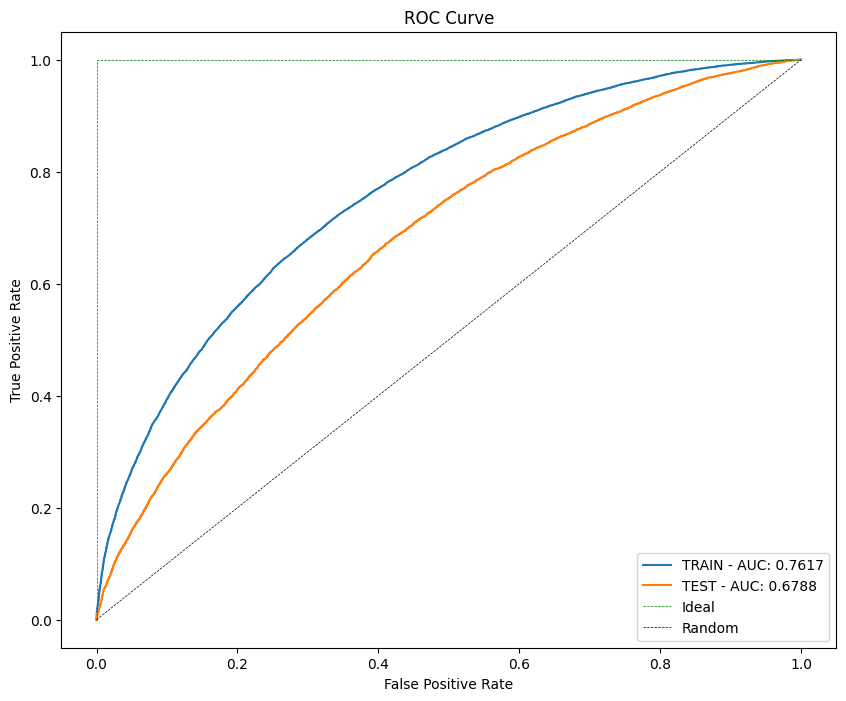

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred) #CALCULAR NOS NUMEROS DE LA MATRIX DE CONFUSION

[]

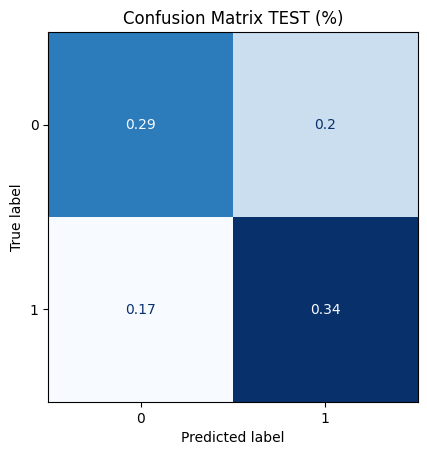

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

In [ ]:

TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [ ]:
accuracy_test = (TN+TP)/total
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
f1_test = 2/(1/recall_test + 1/precision_test)

In [ ]:
print('Accuracy:',round(accuracy_test,4))
print('Precision:',round(precision_test,4))
print('Recall:',round(recall_test,4))
print('F1-score:',round(f1_test,4))

Accuracy: 0.6303
Precision: 0.6256
Recall: 0.6732
F1-score: 0.6485


In [ ]:
from sklearn.metrics import roc_auc_score

# Calcular AUC para los datos de entrenamiento
auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
print('AUC Train:', auc_train)

# Calcular AUC para los datos de prueba
auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('AUC Test:', auc_test)

AUC Train: 0.7617019971120556
AUC Test: 0.6787990951816347


# INTERPRETABILITY

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.5 MB/s eta 0:00:00


In [ ]:
import shap


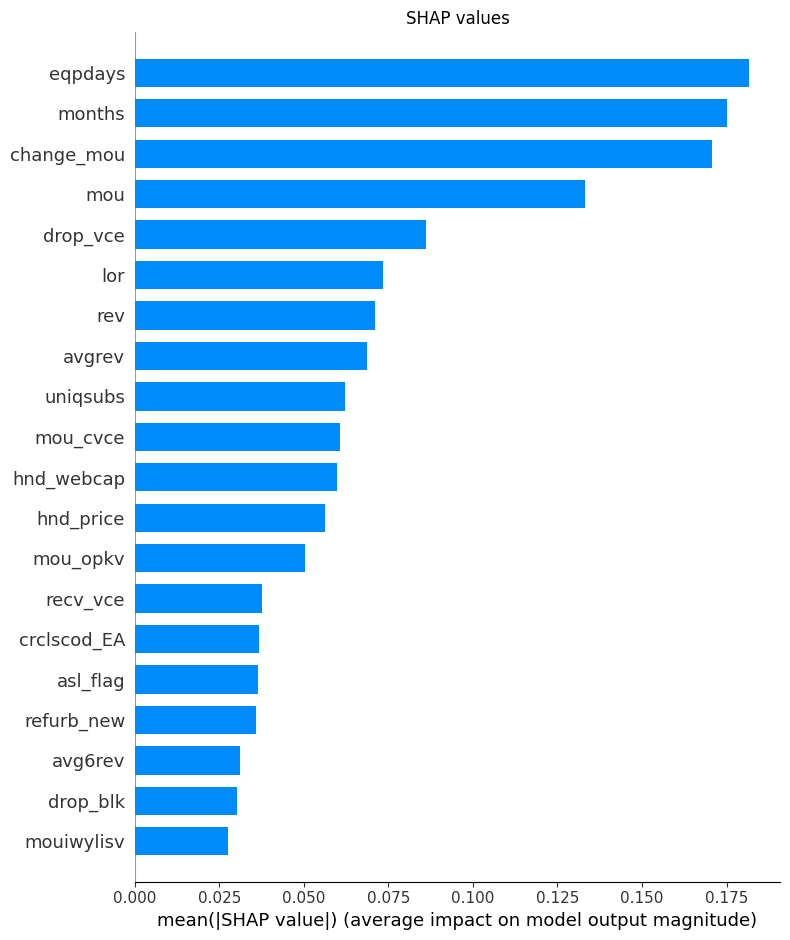

In [ ]:

#  shap value grafico
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

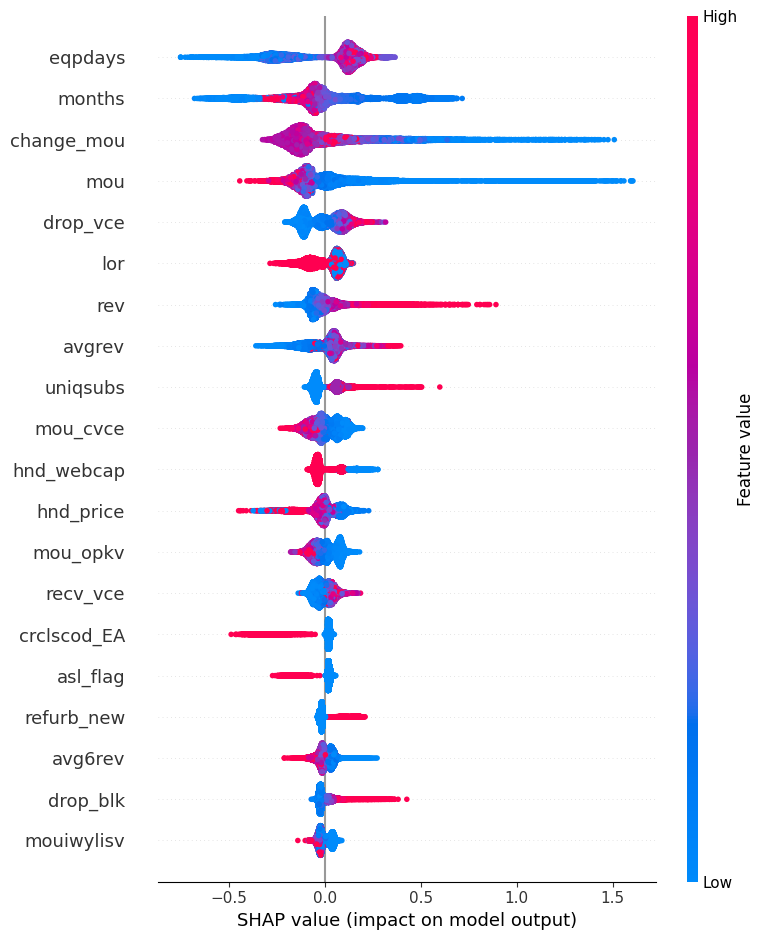

In [ ]:

shap.summary_plot(shap_values, X_test)